In [595]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

<img src="HW_1.jpg">

### Define system parameters

In [603]:
G = np.array(
    [[1  , 0.2, 0.1],               # Gain matrix
    [0.1,   2, 0.1], 
    [0.3, 0.1,   3]
])
gamma = 5                         # Minimum SINR
alpha = 1.4                       # Safety margin
sigma = 0.01                      # Noise power 

### Factorization

In [604]:
# initiate the matrix A
A = np.zeros((3,3))
# calculate over the non-diagonal elements
for i in range(1,3):
    for j in range(1,3):
        if (i!=j):
            A[i][j] = alpha*gamma*G[i][j]/G[i][i]
                   
# initiate the matrix b
b = np.zeros((3,1))
# calculate all elements
for i in range(1,3):
    b[i] = alpha*gamma*sigma/G[i][i]

### Simulation (only 100 iteration)

In [625]:
num_iterations = 100;

p_i = [[0.25],[0.50],[0.75]]
       
S = []
S.append(
    [G[0][0]*p_i[0][0]/(sigma+G[0][1]*p_i[1][0]+G[0][2]*p_i[2][0]),
     G[1][1]*p_i[1][0]/(sigma+G[1][0]*p_i[0][0]+G[1][2]*p_i[2][0]),
     G[2][2]*p_i[2][0]/(sigma+G[2][0]*p_i[0][0]+G[2][1]*p_i[1][0])])

p = []
p.append(np.array(p_i))

for i in range(1, num_iterations):
    p_i = A @ p_i + b
    p.append(p_i)
    SINR_current = [G[0][0]*p_i[0][0]/(sigma+G[0][1]*p_i[1][0]+G[0][2]*p_i[2][0]),
                    G[1][1]*p_i[1][0]/(sigma+G[1][0]*p_i[0][0]+G[1][2]*p_i[2][0]),
                    G[2][2]*p_i[2][0]/(sigma+G[2][0]*p_i[0][0]+G[2][1]*p_i[1][0])]
    S.append(SINR_current)

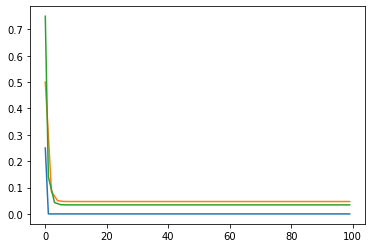

In [626]:
sns.lineplot(range(num_iterations), np.array(p)[:, 0].flatten())
sns.lineplot(range(num_iterations), np.array(p)[:, 1].flatten())
sns.lineplot(range(num_iterations), np.array(p)[:, 2].flatten());

<AxesSubplot:>

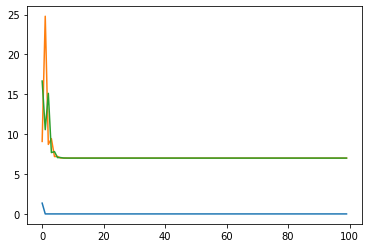

In [627]:
sns.lineplot(range(num_iterations), np.array(S)[:, 0].flatten())
sns.lineplot(range(num_iterations), np.array(S)[:, 1].flatten())
sns.lineplot(range(num_iterations), np.array(S)[:, 2].flatten())